# ClusterAnalyzer Library Demonstration

The ClusterAnalyzer module is a versatile and comprehensive library developed to analyze cluster dynamics within any two-dimensional grid system. It includes functionality for studying both Conway’s Game of Life and the Logistic Game of Life, along with some details associated with these models. This notebook demonstrates the capabilities of ClusterAnalyzer, covering features such as:


- Game of Life (GOL)
- Logistic Game of Life (LogisticGOL)
- Activity Rate Calculation
- Cluster Analysis
- Statistical Analysis
- Cluster Visualization
- Lambda Neighborhood Transitions

We will walk through each functionality with explanations and code examples.

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt 

from cluster_analyzer.game_of_life import GOL, LogisticGOL, lambda_neighborhood_transitions,simulate_LGOL_for_averages
from cluster_analyzer.activity import calculate_activity_rate
from cluster_analyzer.cluster import analyze_clusters, box_counting
from cluster_analyzer.statistical_analysis import  perform_plausibility_tests, generate_plots
from cluster_analyzer.visualization import plot_clusters


## 1. Game of Life (GOL) Demonstration

The Game of Life is a cellular automaton devised by mathematician John Conway. It consists of a grid of cells that evolve through discrete time steps according to a set of simple rules based on the states of neighboring cells.

In this section, we'll:

- Initialize a random grid.
- Run the Game of Life for a specified number of time steps.
- Visualize the initial and final states.


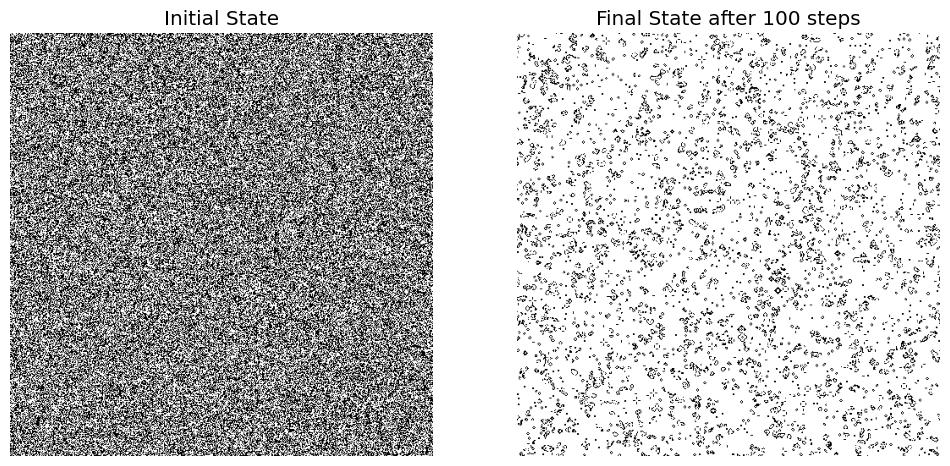

In [2]:
# Initialize a random grid
grid_size =500
initial_grid = np.random.randint(2, size=(grid_size, grid_size))

# Set the number of time steps
time_steps = 100

# Run the Game of Life
final_grid = GOL(initial_grid.copy(), time_steps)

# Plot initial and final states
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(initial_grid, cmap='binary')
ax[0].set_title('Initial State')
ax[0].axis('off')

ax[1].imshow(final_grid, cmap='binary')
ax[1].set_title(f'Final State after {time_steps} steps')
ax[1].axis('off')

plt.show()


## 2. Logistic Game of Life (LogisticGOL) Demonstration

The Logistic Game of Life extends the classic Game of Life by introducing custom growth, stability, and decay rules based on a logistic function and the Cantor set.

In this section, we'll:

- Set parameters for the LogisticGOL.
- Initialize a grid with appropriate states.
- Run the simulation.
- Visualize the initial and final states.


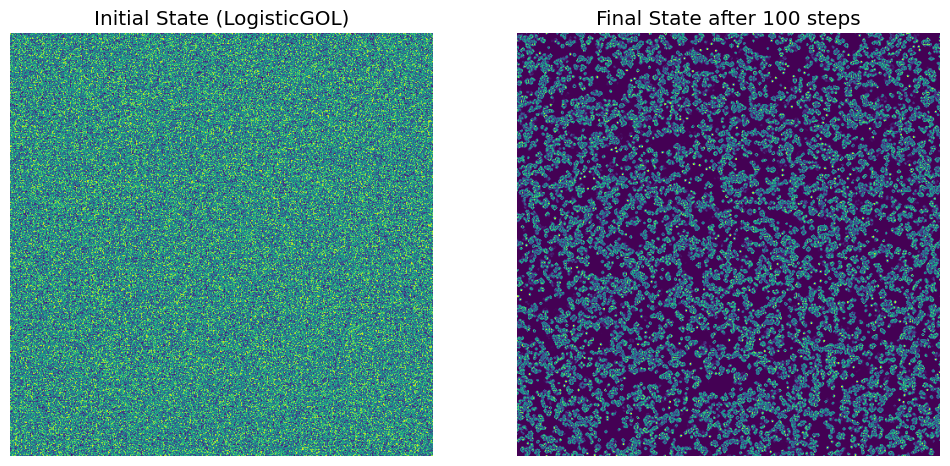

In [3]:
# Parameters for LogisticGOL
t1 = 1.5
t2 = 2.5
t3 = 3.5
order = 10
lamda = 0.86055

# Calculate L based on the order
L = 2 ** (order + 1)

# Initialize a random grid with states between 0 and L - 1
initial_grid_logistic = np.random.randint(L, size=(grid_size, grid_size))

# Run the LogisticGOL
final_grid_logistic = LogisticGOL(initial_grid_logistic.copy(), time_steps, t1, t2, t3, order, lamda)

# Plot initial and final states
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(initial_grid_logistic, cmap='viridis')
ax[0].set_title('Initial State (LogisticGOL)')
ax[0].axis('off')

ax[1].imshow(final_grid_logistic, cmap='viridis')
ax[1].set_title(f'Final State after {time_steps} steps')
ax[1].axis('off')

plt.show()


## 3. Cluster Visualization

Visualizing clusters helps in understanding their spatial distribution and patterns.

In this section, we'll:

- Use the `plot_clusters` function to visualize the real space and the top clusters. 

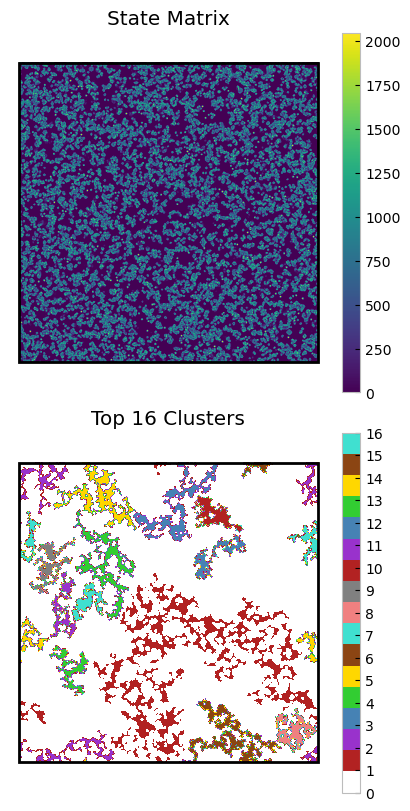

In [4]:
# Initialize a random grid with states between 0 and L - 1
 
grid_size=500
 
initial_grid_logistic = np.random.randint(L, size=(grid_size, grid_size))
 

time_steps=int(1e2) 
lamda=0.8605
# Run the LogisticGOL
final_grid_logistic = LogisticGOL(initial_grid_logistic.copy(), time_steps, t1, t2, t3, order, lamda)
# Visualize clusters
plot_clusters(final_grid_logistic, n_clusters=16, figsize=(4, 8)) # Visualize the largest 16 clusters


## 4. Lambda Neighborhood Transitions

This functionality generates Cantor sets and finds combinations of states that sum up to a target value within a given tolerance, using both numerical and symbolic computations.

In this section, we'll:

- Define parameters for lambda neighborhood transitions.
- Use the `lambda_neighborhood_transitions` function.
- Display the results.


In [5]:
# Import sympy as sp (needed for lambda_neighborhood_transitions)
import sympy as sp

# Parameters
lambda_value = 0.86055
target_value = 3.5
num_states = 8
max_order = 5
tolerance = 1e-4

# Perform lambda neighborhood transitions
result = lambda_neighborhood_transitions(lambda_value, target_value, num_states, max_order, tolerance)

if result:
    print(f"\nFound combination for λ = {lambda_value}:")
    print(f"Selected states (total of {len(result['selected_numerical_states'])}):")
    for idx, (num_state, sym_state) in enumerate(
        zip(result['selected_numerical_states'], result['selected_symbolic_states']), 1
    ):
        print(f"State {idx}: Numerical Value = {num_state}, Symbolic Expression = {sym_state}")
    print(f"\nTotal sum of numerical states: {result['total_numerical_sum']}")
    print(f"\nSimplified symbolic expression:\n{result['simplified_symbolic_expression']}")
    print(f"\nSimplified expression evaluated at λ = {lambda_value}: {result['simplified_value']}")
else:
    print("No suitable combination found.")



Found combination for λ = 0.86055:
Selected states (total of 8):
State 1: Numerical Value = 5.273422805450397e-05, Symbolic Expression = (1 - λ)**5
State 2: Numerical Value = 0.12005643172805448, Symbolic Expression = (1 - λ)*(λ*(1 - (1 - λ)**3) + (1 - λ)**3)
State 3: Numerical Value = 0.12271548438362498, Symbolic Expression = (1 - λ)*(λ**2 - λ + 1)
State 4: Numerical Value = 0.12271548438362498, Symbolic Expression = (1 - λ)*(λ**2 - λ + 1)
State 5: Numerical Value = 0.13944999999999996, Symbolic Expression = 1 - λ
State 6: Numerical Value = 0.9976663717972966, Symbolic Expression = λ**2 + λ*(-λ**2 + λ) + λ*(-λ**2 - λ*(-λ**2 + λ) + λ) - λ + 1
State 7: Numerical Value = 0.9976663717972966, Symbolic Expression = λ**2 + λ*(-λ**2 + λ) + λ*(-λ**2 - λ*(-λ**2 + λ) + λ) - λ + 1
State 8: Numerical Value = 0.999674575547133, Symbolic Expression = λ**2 + λ*(-λ**2 + λ) + λ*(-λ**2 - λ*(-λ**2 + λ) + λ) + λ*(-λ**2 - λ*(-λ**2 + λ) - λ*(-λ**2 - λ*(-λ**2 + λ) + λ) + λ) - λ + 1

Total sum of numerical 

## 5. Calculating Activity Rate

The activity rate measures the proportion of cells that have changed state between two time steps.

In this section, we'll:

- Calculate the activity rate for one time step update of LogisticGOL. 

In [6]:
# Initialize a random grid with states between 0 and L - 1
initial_grid_logistic = np.random.randint(L, size=(grid_size, grid_size))

time_steps=1
# Run the LogisticGOL
final_grid_logistic = LogisticGOL(initial_grid_logistic.copy(), time_steps, t1, t2, t3, order, lamda)

# Calculate activity rate between initial and final grids
activity_rate = calculate_activity_rate(final_grid_logistic, initial_grid_logistic)
print(f'Activity Rate: {activity_rate:.4f}')


Activity Rate: 0.8909


## 6. Cluster Analysis

Cluster analysis involves identifying and analyzing groups (clusters) of connected cells with the same state.

In this section, we'll:

- Analyze clusters in the final grid of LogisticGOL.
- Display the size counts and state cluster counts.
- Perform box counting to estimate fractal dimension.


Note: By conducting multiple samples of the capacity dimension using the box-counting method, one can calculate both the average capacity dimension and its standard deviation.


Size Counts Dictionary:
{1: 249289, 2: 354, 3: 1}

State Cluster Counts Dictionary:
{0: 180, 1: 173, 2: 181, 3: 182, 4: 180, 5: 188, 6: 185, 7: 163, 8: 162, 9: 168, 10: 174, 11: 149, 12: 148, 13: 192, 14: 180, 15: 166, 16: 160, 17: 167, 18: 186, 19: 185, 20: 181, 21: 183, 22: 172, 23: 169, 24: 169, 25: 157, 26: 164, 27: 187, 28: 189, 29: 173, 30: 179, 31: 176, 32: 175, 33: 168, 34: 191, 35: 170, 36: 176, 37: 180, 38: 167, 39: 195, 40: 173, 41: 189, 42: 198, 43: 168, 44: 172, 45: 170, 46: 185, 47: 166, 48: 180, 49: 182, 50: 164, 51: 171, 52: 189, 53: 199, 54: 197, 55: 165, 56: 184, 57: 185, 58: 191, 59: 196, 60: 142, 61: 167, 62: 183, 63: 147, 64: 175, 65: 188, 66: 174, 67: 175, 68: 157, 69: 190, 70: 181, 71: 149, 72: 203, 73: 159, 74: 179, 75: 165, 76: 212, 77: 181, 78: 166, 79: 160, 80: 174, 81: 170, 82: 188, 83: 185, 84: 153, 85: 198, 86: 182, 87: 175, 88: 176, 89: 173, 90: 191, 91: 182, 92: 154, 93: 200, 94: 174, 95: 194, 96: 196, 97: 174, 98: 166, 99: 171, 100: 154, 101: 197, 102: 

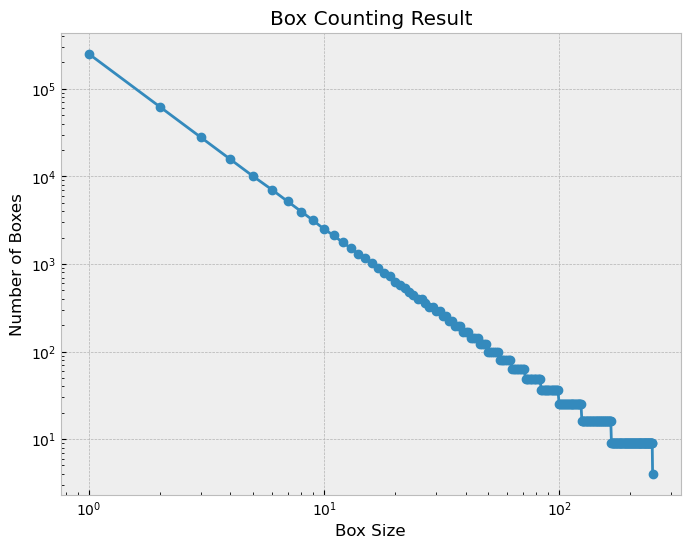

Estimated Fractal Dimension (small n regime): 1.9946


In [7]:
# Analyze clusters in the final grid
size_counts_dict, state_cluster_counts_dict = analyze_clusters(final_grid_logistic)

print('Size Counts Dictionary:')
print(size_counts_dict)
print('\nState Cluster Counts Dictionary:')
print(state_cluster_counts_dict)

# Perform box counting
box_sizes, box_counts = box_counting(final_grid_logistic)
print('\nBox Sizes:', box_sizes)
print('Box Counts:', box_counts)

# Plot the box counting results
plt.figure(figsize=(8,6))
plt.plot(box_sizes, box_counts, 'o-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Box Size')
plt.ylabel('Number of Boxes')
plt.title('Box Counting Result')
plt.show()

# Estimate fractal dimension
log_box_sizes = np.log(box_sizes)
log_box_counts = np.log(box_counts)


#Normally box-counting should be calculated over multiple ensembles and timsteps, here we use a single ensemble and short timestep for demonstration purposes

# Filter for small n regime where box_sizes are between 0 and 6
box_sizes = np.array(box_sizes)
box_counts = np.array(box_counts)
small_n_mask = (box_sizes > 0) & (box_sizes <= 6)
filtered_log_box_sizes = log_box_sizes[small_n_mask]
filtered_log_box_counts = log_box_counts[small_n_mask]

# Perform linear fit to estimate the fractal dimension
slope, intercept = np.polyfit(filtered_log_box_sizes, filtered_log_box_counts, 1)
print(f'Estimated Fractal Dimension (small n regime): {-slope:.4f}')


## 5. Statistical Analysis

We can perform statistical analysis on the cluster sizes to understand their distribution and potential power-law behavior.

In this section, we'll:

- Prepare data for statistical analysis.
- Fit a power-law model to the cluster size distribution.
- Plot the empirical PDF and the fitted power-law model.


In [ ]:
import pandas as pd
from collections import defaultdict
#Normally averages should be calculated over multiple ensembles and longer timestep, here we use a single ensemble and short timestep for demonstration purposes

# Define lambda values to analyze
lmds = [0.80, 0.86055, 0.90]  # Example lambda values

# Define percolation threshold
percolating_thld = 0.86055

# Define downsample sizes for plausibility tests
downsamples_sizes = [500]

# Initialize a list to collect all simulation data
simulation_data = []

# Parameters for the simulation
order = 10  # Order of the Cantor set
sample_number = 1  # Sample identifier
size = 512  # Grid size (N x N)
t = 10000   # Total simulation time steps
start_save = 1000   # Start saving data after this time step
save_interval = 1  # Interval of time steps to save data

# Run the simulation for each lambda value
for lamda in lmds:
    print(f"Running simulation for lambda = {lamda}")
    simulation_results = simulate_LGOL_for_averages(
        order=order,
        sample_number=sample_number,
        size=size,
        lamda=lamda,
        t=t,
        start_save=start_save,
        save_interval=save_interval,
        save_with_simulation=False,  # Set to True to save data during simulation
        filename='LGOL_simulation_data.csv'
        ,box_counting_flag=False #We do not use box counting here, since it takes to much time 
    )
    
    # Extract size counts from the simulation results
    size_counts_list = simulation_results['size_counts_list']
    
    # Aggregate size counts over all saved time steps
    all_size_counts = defaultdict(int)
    for size_counts in size_counts_list:
        for size, count in size_counts.items():
            all_size_counts[size] += count
    
    # Convert size counts to dictionaries
    size_counts_dict = dict(all_size_counts)
    
    # Append one row per lambda with size_counts as a dictionary
    simulation_data.append({'lambda': lamda, 'size_counts': size_counts_dict})
    
    print(f"Completed simulation for lambda = {lamda}\n")


# Convert the simulation data into a DataFrame
df_simulation = pd.DataFrame(simulation_data)

# Perform plausibility tests
perform_plausibility_tests(
    df=df_simulation,
    lmds=lmds,
    TrimLargest=False,
    downsamples_sizes=downsamples_sizes
)

# Generate plots for the statistical analysis
generate_plots(
    df=df_simulation,
    lmds=lmds,
    TrimLargest=False,
)
